(array([-0.8+1.83303028j, -0.8-1.83303028j]), array([[ 0.17888544+0.40987803j,  0.17888544-0.40987803j],
       [-0.89442719+0.j        , -0.89442719-0.j        ]]))
8.0 4.4852813742385695


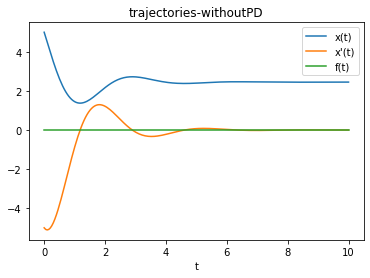

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

d = 4.
K = 10.
m = 2.5
g = 9.8
Kp = 8.
Kv = 2 * np.sqrt(Kp + K) - d


A = np.array([[0, 1],
             [-(K)/m, -(d)/m]])

# Eigenvalues, Eigenvectors
print(np.linalg.eig(A))

# PD controller
print(Kp, Kv)

def df_dx(U, x):
    B = np.array([[0, 0],
             [g, 1/m]])
    du = np.dot(A, U) + np.dot(B, np.array([1, 0]))
    return du

# Initial state
x0 = [5., -5.]
x0 = np.array(x0)

# Resulting trajectory
ts = np.linspace(0, 10, 200)
xs = odeint(df_dx, x0, ts)

f = np.zeros(len(xs))

plt.xlabel("t")
plt.plot(ts, xs[:,0], label='x(t)')
plt.plot(ts, xs[:,1], label='x\'(t)')
plt.plot(ts, f, label='f(t)')
plt.title('trajectories-withoutPD')
plt.legend()
plt.savefig('trajectories-withoutPD.pdf')


(array([-1.69705627+2.07846097j, -1.69705627-2.07846097j]), array([[-0.22086305-0.27050089j, -0.22086305+0.27050089j],
       [ 0.93704257+0.j        ,  0.93704257-0.j        ]]))
8.0 4.4852813742385695


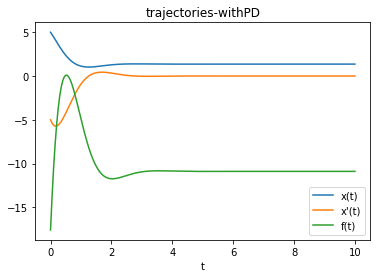

In [2]:
A = np.array([[0, 1],
             [-(K + Kp)/m, -(d + Kv)/m]])

# Eigenvalues, Eigenvectors
print(np.linalg.eig(A))

# PD controller
print(Kp, Kv)

def df_dx(U, x):
    B = np.array([[0, 0],
             [g, 1/m]])
    du = np.dot(A, U) + np.dot(B, np.array([1, 0]))
    return du

# Initial state
x0 = [5., -5.]
x0 = np.array(x0)

# Resulting trajectory
ts = np.linspace(0, 10, 200)
xs = odeint(df_dx, x0, ts)

f = - Kp * xs[:,0] - Kv * xs[:,1]

plt.xlabel("t")
plt.plot(ts, xs[:,0], label='x(t)')
plt.plot(ts, xs[:,1], label='x\'(t)')
plt.plot(ts, f, label='f(t)')
plt.title('trajectories-withPD')
plt.legend()
plt.savefig('trajectories-withPD.pdf')
